In [351]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.txt


## 1.Load Data

In [352]:
import pandas as pd

In [353]:
df = pd.read_csv('/kaggle/input/titanic/titanic.txt', sep='\t', header = 0) #header คือ การกำหนดเเถวไหนจะเป็น header, ถ้า header = none แปลว่าไม่มี header
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


In [354]:
df.head() 

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No


In [355]:
df.tail()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
1304,Third,"Zabour, Miss. Hileni",Female,14.5,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0,0,0,2670,7.2250,NaN,Cherbourg,NaN,No
1308,Third,"Zimmerman, Mr. Leo",Male,29.0,0,0,315082,7.8750,NaN,Southampton,NaN,No


In [356]:
df.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Cabin', 'Port of Embarkation', 'Life Boat', 'Survived'],
      dtype='object')

In [357]:
df['Name'] 

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: Name, Length: 1309, dtype: object

In [358]:
df.iloc[2,0:5]

Passenger Class                                              First
Name                                  Allison, Miss. Helen Loraine
Sex                                                         Female
Age                                                              2
No of Siblings or Spouses on Board                               1
Name: 2, dtype: object

In [359]:
df.loc[2,'Passenger Class':'Age']

Passenger Class                           First
Name               Allison, Miss. Helen Loraine
Sex                                      Female
Age                                           2
Name: 2, dtype: object

In [360]:
df.dtypes #object = string

Passenger Class                        object
Name                                   object
Sex                                    object
Age                                   float64
No of Siblings or Spouses on Board      int64
No of Parents or Children on Board      int64
Ticket Number                          object
Passenger Fare                        float64
Cabin                                  object
Port of Embarkation                    object
Life Boat                              object
Survived                               object
dtype: object

In [361]:
df['Age'].max()


80.0

In [362]:
df['Age'].min()

0.1667

In [363]:
df[df['Age']==df['Age'].min()]

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
763,Third,"Dean, Miss. Elizabeth Gladys 'Millvina'",Female,0.1667,1,2,C.A. 2315,20.575,NaN,Southampton,10,Yes


In [364]:
df['Name'][df['Age']==df['Age'].max()]

14    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

In [365]:
df.shape

(1309, 12)

In [366]:
df['Sex'].tolist()

['Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 '

In [367]:
df.values

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', nan, 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        nan, 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', nan,
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', nan,
        'No']], dtype=object)

In [368]:
df['Label'] = df['Age'] >= 20 #ถ้า label มากกว่าเท่ากับ 20 เป็น true น้อยกว่าเป็น false
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes,True
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes,False
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No,True
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No,True


## 3.Check Missing Values

In [369]:
df.isnull() #ถ้าเป้น true = ข้อมูลเป็น null

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,False
1305,False,False,False,True,False,False,False,False,True,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,True,False,False


In [370]:
df.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
Age                                    True
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Ticket Number                         False
Passenger Fare                         True
Cabin                                  True
Port of Embarkation                    True
Life Boat                              True
Survived                              False
Label                                 False
dtype: bool

In [371]:
df['Age'].isnull().sum()

263

In [372]:
df['Passenger Fare'].isnull().sum()

1

In [373]:
df['Cabin'].isnull().sum()

1014

In [374]:
df_clean = df
df_clean = df_clean.drop('Cabin',1)
df_clean = df_clean.drop('Ticket Number',1)
df_clean.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare',
       'Port of Embarkation', 'Life Boat', 'Survived', 'Label'],
      dtype='object')

In [375]:
df_clean = df_clean.dropna(1,'any')

In [376]:
df_clean = df_clean.dropna(0,'any')

In [377]:
df_clean.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Survived                              False
Label                                 False
dtype: bool

In [378]:
df_clean['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [379]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,First,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,First,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",F,1,0,No,False
1305,Third,"Zabour, Miss. Thamine",F,1,0,No,False
1306,Third,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,Third,"Zakarian, Mr. Ortin",M,0,0,No,True


In [380]:
df_clean['Passenger Class'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [381]:
p_class,levels = pd.factorize(df_clean['Passenger Class'])

In [382]:
p_class #เปลี่ยนจาก string เป็นตัวเลข

array([0, 0, 0, ..., 2, 2, 2])

In [383]:
levels 

Index(['First', 'Second', 'Third'], dtype='object')

In [384]:
df_clean['Passenger Class'] = p_class
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,0,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,0,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,0,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,0,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,2,"Zabour, Miss. Hileni",F,1,0,No,False
1305,2,"Zabour, Miss. Thamine",F,1,0,No,False
1306,2,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,2,"Zakarian, Mr. Ortin",M,0,0,No,True


In [385]:
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                   object
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                              object
Label                                   bool
dtype: object

In [386]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                    int64
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                               int64
Label                                   bool
dtype: object

In [387]:
df_clean = df_clean.set_index('Name')
df_clean

,Passenger Class,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
Name,,,,,,
"Allen, Miss. Elisabeth Walton",0,0,0,0,0,True
"Allison, Master. Hudson Trevor",0,1,1,2,0,False
"Allison, Miss. Helen Loraine",0,0,1,2,1,False
"Allison, Mr. Hudson Joshua Creighton",0,1,1,2,1,True
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,0,1,2,1,True
...,...,...,...,...,...,...
"Zabour, Miss. Hileni",2,0,1,0,1,False
"Zabour, Miss. Thamine",2,0,1,0,1,False
"Zakarian, Mr. Mapriededer",2,1,0,0,1,True


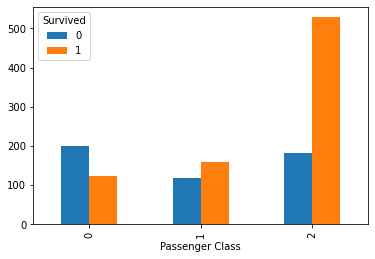

In [388]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')

## Ex.1

In [389]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [390]:
df = df.set_index('hn')
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [391]:
df.isnull()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2633481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2634477,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2633633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2630496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3167041,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2623351,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [392]:
df.isnull().sum()

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

In [393]:
df_clean = df
df_clean = df_clean.dropna(0,'any')
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,4.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,4.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,4.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,4.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [394]:
df_clean = df_clean.drop('hiv',1)
df_clean = df_clean.drop('size',1)
df_clean = df_clean.drop('utmet',1)
df_clean = df_clean.drop('vgmet',1)
df_clean = df_clean.drop('surgery',1)
df_clean = df_clean.drop('pchemo',1)
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [395]:
df_clean.isnull().sum()

age           0
parity        0
menopaus      0
disease       0
conization    0
OPDsize       0
appearance    0
stage         0
Wardsize      0
finalhisto    0
nodeyiel      0
RHlvsi        0
depth         0
vgmargin      0
pelvicme      0
pmmet         0
adnmet        0
dtype: int64

In [396]:
df_clean['age'] = df_clean['age'] > 20 
df_clean['age'] = df_clean['age'].replace(True,'Old')
df_clean['age'] = df_clean['age'].replace(False,'Young')
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [397]:
df_clean1 = df_clean['pmmet'].unique()
df_clean1

array([0., 1.])

In [398]:
df_clean[(df_clean['pmmet']==df_clean1[0])]

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0


In [399]:
df_clean[(df_clean['pmmet']==df_clean1[1])]

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0


In [400]:
df_clean.sample(10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3468217,Old,0,0.0,0,0.0,4.0,1.0,4.0,4.0,2.0,36.0,999.0,2.0,0.0,1.0,1.0,0.0
3811285,Old,2,0.0,0,0.0,1.5,1.0,4.0,2.0,3.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0
2707441,Old,1,0.0,0,0.0,2.5,2.0,4.0,2.5,2.0,38.0,0.0,3.0,0.0,0.0,0.0,0.0
3161163,Old,2,0.0,0,0.0,2.0,1.0,4.0,2.0,1.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
2821640,Old,0,0.0,0,0.0,5.0,3.0,5.0,5.0,1.0,31.0,13.0,3.0,0.0,0.0,0.0,2.0
3232982,Old,2,1.0,1,1.0,0.0,5.0,3.0,0.0,1.0,28.0,999.0,2.0,0.0,0.0,0.0,0.0
2845536,Old,3,0.0,0,0.0,4.0,1.0,4.0,3.0,4.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0
3363264,Old,4,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,24.0,999.0,3.0,0.0,0.0,1.0,0.0
3095812,Old,2,1.0,0,0.0,3.0,2.0,4.0,2.0,1.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0


## Ex.2


In [401]:
import matplotlib.pyplot as plt
import numpy as np

In [402]:
df_disease = df_clean['disease'].unique()
df_clean[(df_clean['disease']==df_disease[0])] #เเสดงคนที่มี disease = 1

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
2633001,Old,2,0.0,1,0.0,2.5,1.0,4.0,3.0,1.0,19.0,0.0,2.0,0.0,0.0,0.0,0.0
2640167,Old,1,0.0,1,0.0,2.0,1.0,4.0,2.0,1.0,24.0,1.0,1.0,0.0,0.0,0.0,0.0
2641829,Old,6,1.0,1,0.0,1.0,2.0,4.0,1.0,1.0,18.0,6.0,3.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0


In [403]:
df_disease = df_clean['disease'].unique()
df_clean[(df_clean['disease']==df_disease[1])] #เเสดงคนที่มี disease = 0

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2639340,Old,3,0.0,0,0.0,4.0,1.0,4.0,5.0,2.0,32.0,11.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813621,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,2.0,15.0,3.0,3.0,0.0,0.0,0.0,0.0
3811285,Old,2,0.0,0,0.0,1.5,1.0,4.0,2.0,3.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0


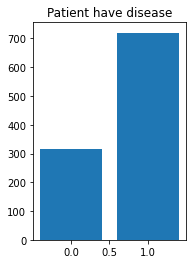

In [404]:
disease = np.unique(df_clean['disease'])
disease_value = [sum(df_clean['disease']==df_disease[0]),
                 sum(df_clean['disease']==df_disease[1])]

plt.subplot(1,2,1)

plt.bar(disease,disease_value)
plt.show()

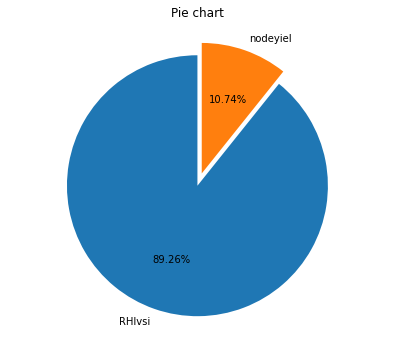

In [405]:
all_row = df_clean.shape
all_row
fig = plt.figure(1, figsize=(15,6))
labels = ['RHlvsi', 'nodeyiel']
perc = [sum(df_clean['RHlvsi'])/all_row[0], 
        sum(df_clean['nodeyiel'])/all_row[0]] 
        

explode = (0, 0.1)  
plt.subplot(1,2,1)
plt.title('Pie chart')
plt.axis('equal')
plt.pie(perc, labels=labels, autopct='%1.2f%%', 
        startangle=90, explode=explode)

plt.show()        

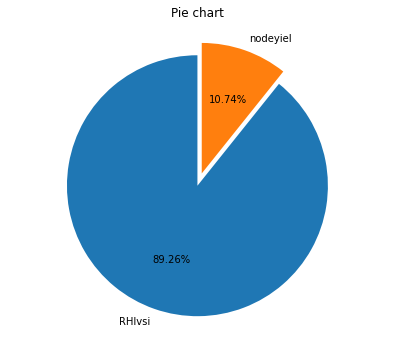

In [406]:
fig = plt.figure(1, figsize=(15,6))
labels = ['RHlvsi', 'nodeyiel']
perc = [sum(df_clean['RHlvsi'])/all_row[0], 
        sum(df_clean['nodeyiel'])/all_row[0]] 
        

explode = (0, 0.1)  
plt.subplot(1,2,1)
plt.title('Pie chart')
plt.axis('equal')
plt.pie(perc, labels=labels, autopct='%1.2f%%', 
        startangle=90, explode=explode)

plt.show()        

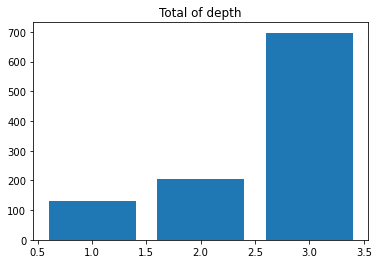

In [410]:
check = np.sort(df_clean['depth'].unique())
depth = [sum(df_clean['depth'] == check[0]),
        sum(df_clean['depth'] == check[1]),
        sum(df_clean['depth'] == check[2]),]
        
plt.title('Total of depth')
plt.bar(check,depth)
plt.show()